In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.decomposition import PCA

[]

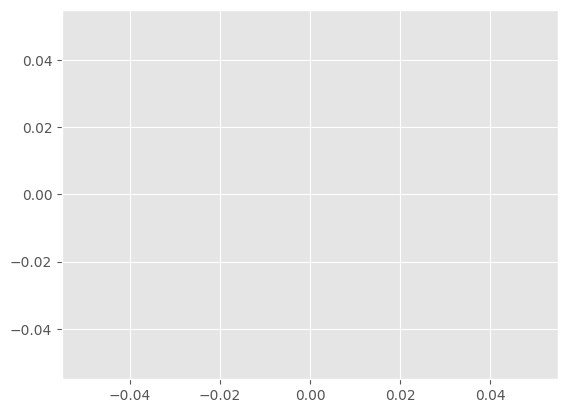

In [2]:
PATH = "../data/shakespeare.txt"
sw = stopwords.words('english')
plt.style.use('ggplot')
plt.plot()

In [3]:
lines = []
with open(PATH, 'r') as f:
    for l in f:
        lines.append(l)

In [4]:
# remove new lines:
lines = [line.rstrip('\n') for line in lines]

In [5]:
# lower case:
lines = [line.lower() for line in lines]

In [6]:
# remove punctuations and each line:
lines = [line.translate(str.maketrans('','', string.punctuation)) for line in lines]

In [7]:
# tokenize:

lines = [word_tokenize(line) for line in lines]

In [8]:
def remove_stopwords(lines, sw = sw):

    '''remove stopwords from tokenized lines'''
    
    res = []
    for line in lines:
        original = line

        line = [ w for w in line if w not in sw]

        if len(line) < 1:
            line = original
        res.append(line)
    return res

filtered_lines = remove_stopwords(lines = lines, sw = sw)

In [12]:
# Embedding model

w = w2v(
    filtered_lines,
    min_count=3,
    sg = 1,
    window=7
)

print(w.wv.most_similar('thou'))

[('thyself', 0.8219565749168396), ('art', 0.8215608596801758), ('dost', 0.7802932858467102), ('villain', 0.7393423318862915), ('wilt', 0.7053443193435669), ('didst', 0.6897509098052979), ('kill', 0.6876711845397949), ('traitor', 0.6849212646484375), ('wherefore', 0.6831180453300476), ('slave', 0.6802176237106323)]


In [13]:
emb_df = (
    pd.DataFrame(
        [w.wv.get_vector(str(n)) for n in w.wv.key_to_index],
        index = w.wv.key_to_index
    )
)
print(emb_df.shape)
emb_df.head()

(11628, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
thou,0.094059,0.057710,0.455739,0.401934,-0.382787,-0.565302,0.487482,0.539272,-0.445844,-0.390654,...,0.079026,-0.052224,0.185934,-0.051152,0.781179,0.502632,-0.659279,-0.572549,-0.112842,0.331605
thy,-0.124038,0.144134,0.453196,0.290158,0.009757,-0.383638,0.516801,0.562237,-0.059821,-0.180660,...,0.062959,-0.152437,0.639807,-0.401310,0.251275,0.305254,-0.137786,-0.281994,-0.133903,-0.068429
shall,0.094052,0.122101,0.044091,-0.164529,0.641511,-0.190510,-0.001716,0.382563,-0.440685,-0.136246,...,0.096706,0.018898,-0.068698,-0.243463,0.670415,0.002860,0.159568,-0.320442,0.178174,0.101857
thee,-0.215750,0.491096,0.774126,-0.033991,0.225709,-0.264182,0.217817,0.635892,-0.224019,-0.436710,...,0.313242,-0.213914,-0.037036,-0.186913,0.690924,0.408980,-0.086347,-0.322260,-0.037600,-0.046697
good,-0.064858,0.244281,0.488481,-0.072176,0.175186,-0.087899,-0.158120,0.605077,-0.411273,0.228324,...,0.424581,-0.096510,0.335074,0.064402,0.560072,0.036600,-0.180503,-0.258957,0.312256,-0.175585


[]

<Figure size 640x480 with 0 Axes>

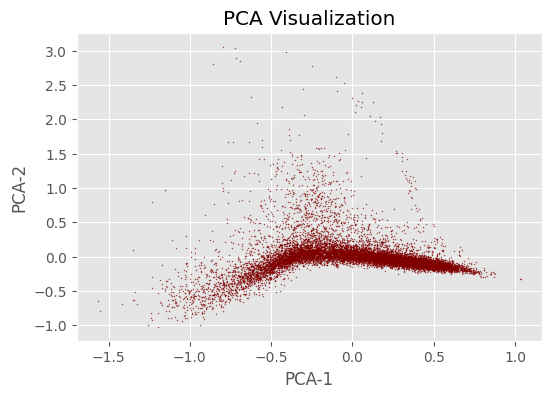

In [14]:
pca = PCA(n_components=2, random_state=7)
pca_mdl = pca.fit_transform(emb_df)

emb_df_PCA = (
    pd.DataFrame(
        pca_mdl,
        columns=['x','y'],
        index = emb_df.index
    )
)

plt.clf()
fig = plt.figure(figsize=(6,4))

plt.scatter(
    x = emb_df_PCA['x'],
    y = emb_df_PCA['y'],
    s = 0.4,
    color = 'maroon',
    alpha = 0.5
)

plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('PCA Visualization')
plt.plot()